# SET/RESET final conductance sweeps

We test the effect of pulses with different VBL/VSL on final conductance gf.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Set VDDIO
vddio = 33


## SET sweep

In [17]:
# Load SET sweep data
setdata = pd.read_csv(f"../data/sweep/setsweep25.csv.gz", delimiter="\t", names=["addr", "t", "vwl", "vbl", "pw"] + [f"gi[{i}]" for i in range(16)] + [f"gf[{i}]" for i in range(16)])
setdata = pd.concat([setdata[["addr","t","vwl","vbl","pw",f"gi[{i}]",f"gf[{i}]"]].rename(columns={f"gi[{i}]" : "gi", f"gf[{i}]" : "gf"}) for i in range(16)])
setdata

,addr,t,vwl,vbl,pw,gi,gf
0,58881,1.685559e+09,0,0,1,6,6
1,58292,1.685559e+09,0,4,1,9,9
2,30216,1.685559e+09,0,8,1,4,4
3,44022,1.685559e+09,0,12,1,5,4
4,43578,1.685559e+09,0,16,1,5,31
...,...,...,...,...,...,...,...
136825,22753,1.685598e+09,226,8,16,35,37
136826,50171,1.685598e+09,226,12,16,30,38
136827,21265,1.685598e+09,226,16,16,5,42
136828,6292,1.685598e+09,226,20,16,7,49


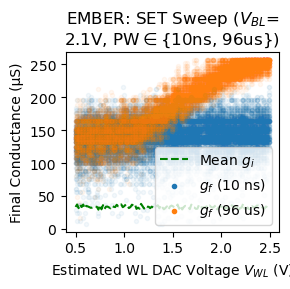

In [34]:
# Plot SET sweep
fig = plt.figure(figsize=(3,3))
ax = plt.axes()

d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 1) & (setdata["vbl"] == 24)][["vwl","vbl","pw","gi","gf"]]
d["vwl"] = (d["vwl"]*2/255) + 0.5
(d.groupby("vwl")["gi"].mean() * 4).plot(color="green", linestyle="--", label="Mean $g_i$")
ax.scatter(d["vwl"], d["gf"]*4, marker=".", alpha=0.05, label="$g_f$ (10 ns)")
# (d.groupby("vwl")["gf"].mean() * 4).plot(label="Mean $g_f$ (10 ns)")

d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 2048) & (setdata["vbl"] == 24)][["vwl","vbl","pw","gi","gf"]]
d["vwl"] = (d["vwl"]*2/255) + 0.5
ax.scatter(d["vwl"], d["gf"]*4, marker=".", alpha=0.05, label="$g_f$ (96 us)")
# (d.groupby("vwl")["gf"].mean() * 4).plot(label="Mean $g_f$ (96 us)")

# d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 512) & (setdata["vbl"] == 24)][["vwl","vbl","pw","gi","gf"]]
# d["vwl"] = (d["vwl"]*2/255) + 0.5
# # ax.scatter(d["vwl"], d["gf"]*4, marker=".", alpha=0.05, label="$g_f$")
# (d.groupby("vwl")["gf"].mean() * 4).plot(label="Mean $g_f$ (24 us)")

# d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 128) & (setdata["vbl"] == 24)][["vwl","vbl","pw","gi","gf"]]
# d["vwl"] = (d["vwl"]*2/255) + 0.5
# # ax.scatter(d["vwl"], d["gf"]*4, marker=".", alpha=0.05, label="$g_f$")
# (d.groupby("vwl")["gf"].mean() * 4).plot(label="Mean $g_f$ (6.4 us)")

# d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 32) & (setdata["vbl"] == 24)][["vwl","vbl","pw","gi","gf"]]
# d["vwl"] = (d["vwl"]*2/255) + 0.5
# # ax.scatter(d["vwl"], d["gf"]*4, marker=".", alpha=0.05, label="$g_f$")
# (d.groupby("vwl")["gf"].mean() * 4).plot(label="Mean $g_f$ (1.6 us)")

# d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 8) & (setdata["vbl"] == 24)][["vwl","vbl","pw","gi","gf"]]
# d["vwl"] = (d["vwl"]*2/255) + 0.5
# # ax.scatter(d["vwl"], d["gf"]*4, marker=".", alpha=0.05, label="$g_f$")
# (d.groupby("vwl")["gf"].mean() * 4).plot(label="Mean $g_f$ (400 ns)")

# d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 2) & (setdata["vbl"] == 24)][["vwl","vbl","pw","gi","gf"]]
# d["vwl"] = (d["vwl"]*2/255) + 0.5
# (d.groupby("vwl")["gf"].mean() * 4).plot(label="Mean $g_f$ (100 ns)")

ax.set_title(f"EMBER: SET Sweep ($V_{{BL}}$=\n2.1V, PW$\in${{10ns, 96us}})", y=1)
ax.set_xlabel("Estimated WL DAC Voltage $V_{WL}$ (V)")
ax.set_ylabel("Final Conductance (μS)")
legend = ax.legend()
for lh in legend.legend_handles: 
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig(f"figs/setsweep{vddio}_wl_ember.png", dpi=300)

In [36]:
# Load SET sweep data
setdata = pd.read_csv(f"../data/sweep/set_sweep.sapiens.tsv", delimiter="\t", names=["addr", "pw", "vwl", "vbl", "ri", "rf"])
setdata["gi"] = 1/setdata["ri"]
setdata["gf"] = 1/setdata["rf"]
setdata

,addr,pw,vwl,vbl,ri,rf,gi,gf
0,0,2.000000e-08,0.5,0.5,151240.470662,115068.986898,0.000007,0.000009
1,2,2.000000e-08,0.5,1.0,123855.302213,124977.565706,0.000008,0.000008
2,4,2.000000e-08,0.5,1.5,127236.989693,106676.196742,0.000008,0.000009
3,6,2.000000e-08,0.5,2.0,93031.982770,133852.645166,0.000011,0.000007
4,8,2.000000e-08,0.5,2.5,75606.517090,57549.247696,0.000013,0.000017
...,...,...,...,...,...,...,...,...
32763,65526,2.000000e-08,0.5,2.0,109317.710881,94101.452343,0.000009,0.000011
32764,65528,2.000000e-08,0.5,2.5,113645.697912,111313.864785,0.000009,0.000009
32765,65530,2.000000e-08,0.5,3.0,94127.213885,71467.483269,0.000011,0.000014
32766,65532,2.000000e-08,0.6,0.5,64914.017435,76972.838886,0.000015,0.000013


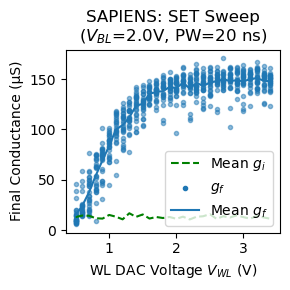

In [40]:
# Plot SET sweep
fig = plt.figure(figsize=(3,3))
ax = plt.axes()

d = setdata[(setdata["gi"] <= 50e-6) & (setdata["pw"] == 2e-8) & (setdata["vbl"] == 2.0)][["vwl","vbl","pw","gi","gf"]]
(d.groupby("vwl")["gi"].mean()*1e6).plot(color="green", linestyle="--", label="Mean $g_i$")
ax.scatter(d["vwl"], d["gf"]*1e6, marker=".", alpha=0.5, label="$g_f$")
(d.groupby("vwl")["gf"].mean()*1e6).plot(label="Mean $g_f$")

ax.set_title(f"SAPIENS: SET Sweep\n($V_{{BL}}$=2.0V, PW=20 ns)", y=1)
ax.set_xlabel("WL DAC Voltage $V_{WL}$ (V)")
ax.set_ylabel("Final Conductance (μS)")
# ax.set_ylim(0, 256)
legend = ax.legend(loc=4)
for lh in legend.legend_handles: 
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig(f"figs/setsweep{vddio}_wl_sapiens.png", dpi=300)